- One of the main problems of linear regression is that it's sensitive to outliers. During data collection in the real world, it's quite common to wrongly measure output. Linear regression uses ordinary least squares, which tries to minimize the squares of errors. The outliers tend to cause problems because they contribute a lot to the overall error. This tends to disrupt the entire model.
-  outliers are values that, compared to others, are particularly extreme (values that are clearly distant from the other observations). Outliers are an issue because they might distort data analysis results; more specifically, descriptive statistics and correlations.
-  Outliers can be univariate when they have an extreme value for a single variable, or multivariate when they have a unique combination of values for a number of variables.

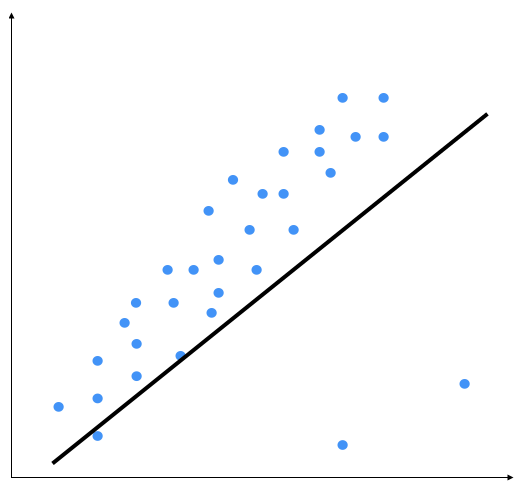

In [1]:
from IPython.display import Image
Image(filename='./images/rdg.png', width=200,height=200) 

The two points on the bottom right are clearly outliers, but this model is trying to fit all the points. Hence, the overall model tends to be inaccurate. Outliers are the extreme values of a distribution that are characterized by being extremely high or extremely low compared to the rest of the distribution, and thus representing isolated cases with respect to the rest of the distribution. By visual inspection, we can see that the following output is a better model:

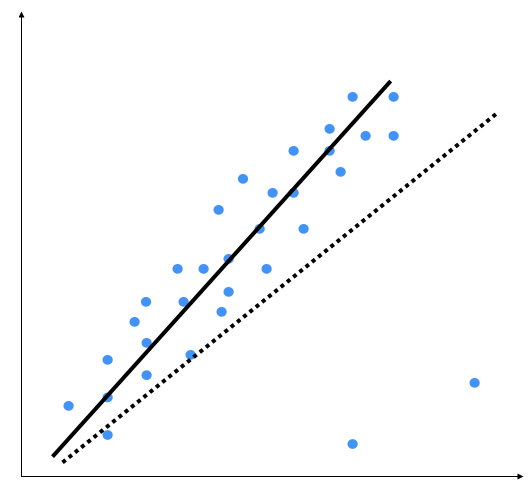

In [2]:
from IPython.display import Image
Image(filename='./images/rdg1.png', width=200,height=200) 

- Ordinary least squares considers every single data point when it's building the model. Hence, the actual model ends up looking like the dotted line shown in the preceding graph. We can clearly see that this model is suboptimal. 

- The regularization method involves modifying the performance function, normally selected as the sum of the squares of regression errors on the training set. When a large number of variables are available, the least square estimates of a linear model often have a low bias but a high variance with respect to models with fewer variables. Under these conditions, there is an overfitting problem. To improve precision prediction by allowing greater bias but a small variance, we can use variable selection methods and dimensionality reduction, but these methods may be unattractive for computational burdens in the first case or provide a difficult interpretation in the other case.

- Another way to address the problem of overfitting is to modify the estimation method by neglecting the requirement of an unbiased parameter estimator and instead considering the possibility of using a biased estimator, which may have smaller variance. There are several biased estimators, most of which are based on regularization: Ridge, Lasso, and ElasticNet are the most popular methods.

Ridge regression is a regularization method where a penalty is imposed on the size of the coefficients. As we said in the Building a linear regressor section, in the ordinary least squares method, the coefficients are estimated by determining numerical values that minimize the sum of the squared deviations between the observed responses and the fitted responses, according to the following equation:

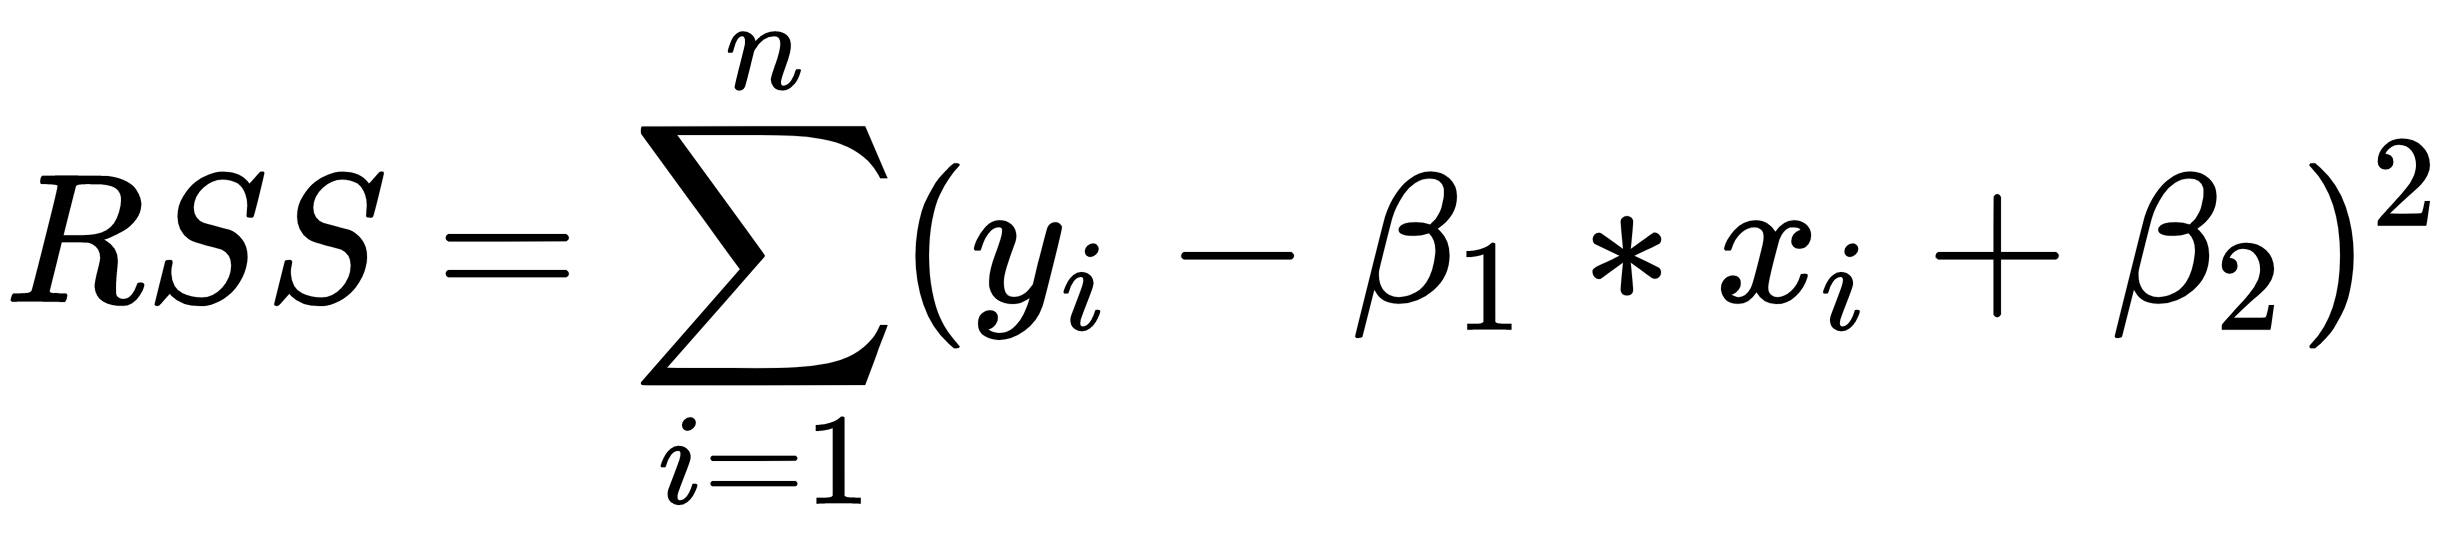

In [3]:
from IPython.display import Image
Image(filename='./images/rdg2.png', width=200,height=200) 

Ridge regression, in order to estimate the β coefficients, starts from the basic formula of the residual sum of squares (RSS) and adds the penalty term. λ (≥ 0) is defined as the tuning parameter, which is multiplied by the sum of the β coefficients squared (excluding the intercept) to define the penalty period, as shown in the following equation:

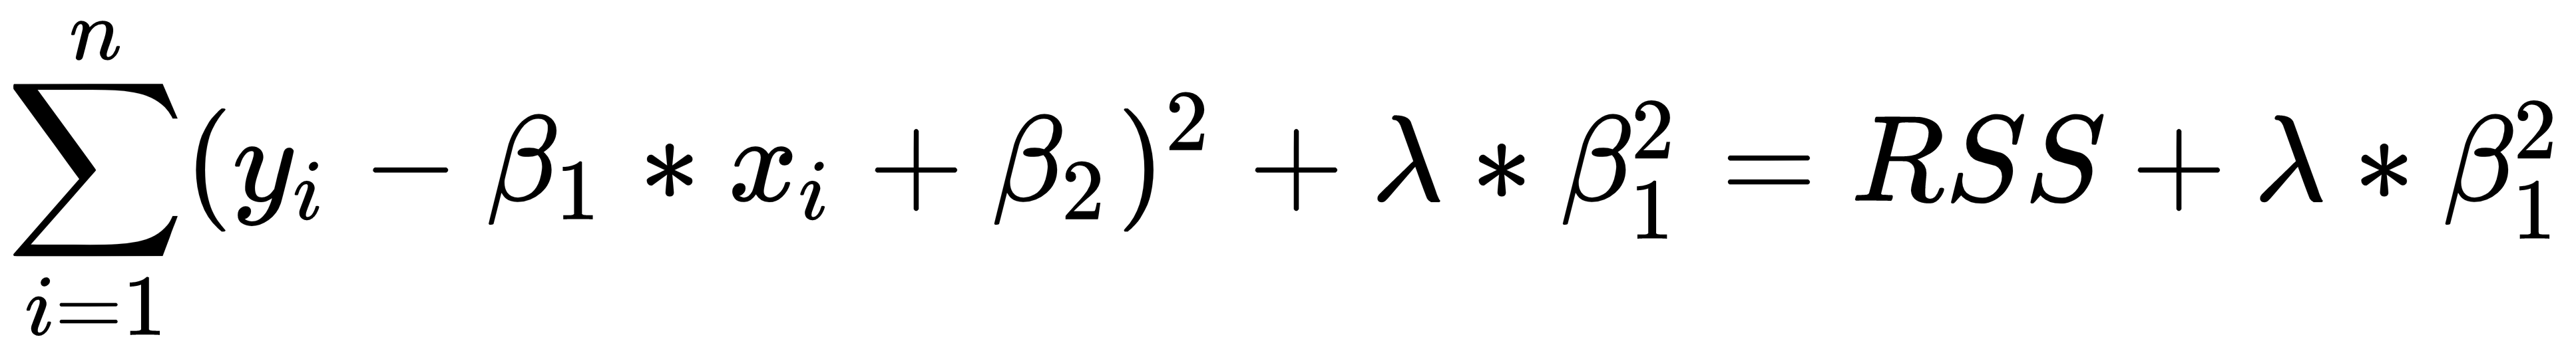

In [5]:
from IPython.display import Image
Image(filename='./images/rdg3.png', width=300,height=300) 

It is evident that having λ = 0 means not having a penalty in the model, that is, we would produce the same estimates as the least squares. On the other hand, having a λ tending toward infinity means having a high penalty effect, which will bring many coefficients close to zero, but will not imply their exclusion from the model. 

In [10]:
from sklearn import linear_model
import sklearn.metrics as sm
filename = "./datasets/VehiclesItaly.txt"

X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)
        
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

import numpy as np

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

ridge_regressor = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)

ridge_regressor.fit(X_train, y_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)


print( "Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_ridge), 2))
print( "Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred_ridge), 2))
print( "Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred_ridge), 2))
print( "Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred_ridge), 2))
print( "R2 score =", round(sm.r2_score(y_test, y_test_pred_ridge), 2))

Mean absolute error = 241907.27
Mean squared error = 81974851872.13
Median absolute error = 240861.94
Explain variance score = 0.98
R2 score = 0.98


<p style="color:blue;">Ridge regression is a regularization method where a penalty is imposed on the size of the coefficients. Ridge regression is identical to least squares, barring the fact that ridge coefficients are computed by decreasing a quantity that is somewhat different. In ridge regression, a scale transformation has a substantial effect. Therefore, to avoid obtaining different results depending on the predicted scale of measurement, it is advisable to standardize all predictors before estimating the model. To standardize the variables, we must subtract their means and divide by their standard deviations.</p>